# Simple discretization methods

In [21]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn.metrics import roc_curve

import plotly.express as px
import plotly.graph_objects as go

# Generation example dataframe

In [22]:
sample_size = 1000

np.random.seed(432409)

example_data = pd.DataFrame(
    {
        "var" : np.random.uniform(-200, 200, size = sample_size)
    }
)

example_data['norm_var'] = (example_data["var"] - example_data['var'].min())/\
                        (example_data["var"].max() - example_data["var"].min())

example_data["class"] = list(map(
    lambda p: np.random.choice([0,1], p=[1-p, p]),
    example_data['norm_var']
))

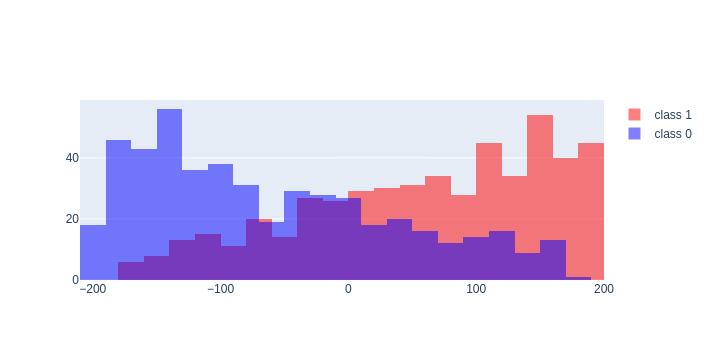

In [24]:
fig = go.Figure()

colors = ["blue", 'red']

for cl in example_data["class"].unique():
    
    fig.add_trace(
        go.Histogram(
            x = example_data.query("`class` == " + str(cl))["var"],
            marker_color = colors[cl],
            opacity = 0.5, 
            name = "class " + str(cl)
        )
    )

fig.update_layout(barmode='overlay')

fig.show()

# One cut point by KS stat

This method is based on findig the point where ecdf of the classes differ the most. We can use property of ROC curves components.

$$TPR = 1 - \hat{F}_p(x)$$
$$FPR = 1 - \hat{F}_n(x)$$

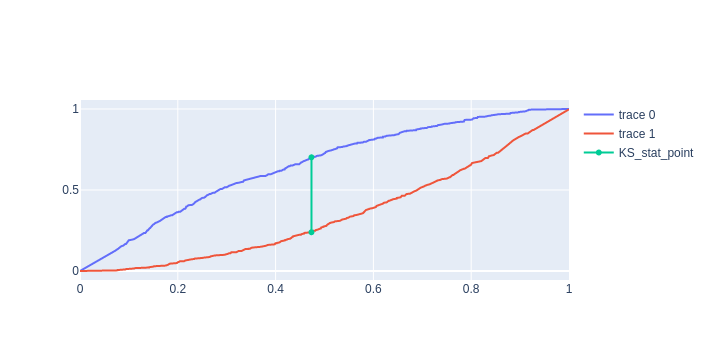

In [38]:
tpr, fpr, thresholds = \
   (res[1:] for res in roc_curve(example_data["class"], example_data["norm_var"]))

F_p = 1 - tpr
F_n = 1 - fpr

fig = go.Figure()

fig.add_trace(go.Scatter(x = thresholds, y = F_p))
fig.add_trace(go.Scatter(x = thresholds, y = F_n))

KS_ind = np.argmax(np.abs(fpr - tpr))

fig.add_trace(go.Scatter(
    x = [thresholds[KS_ind]]*2, 
    y = [F_p[KS_ind], F_n[KS_ind]],
    name = "KS_stat_point"
))

The point which corresponds to KS stat will become point which will divide the variable into two parts. 

# Realisation as a funtion

In [ ]:
def to_binary_by_KS(X, y):
    '''
        Recodes the input row as to classes by point corresponds to KS stat
        Inputs:
            X - np.array of shape (n_sample, ), the series which should be encoded;
            y - np.array of shape (n_sample, ), the classes of observations.
        Output
            np.array of shape (n_sample, ) which desribes ranges as 
            (-inf, KS_point] (KS_point, inf)
    '''
    
    tpr, fpr, thresholds = \
       (res[1:] for res in roc_curve(example_data["class"], example_data["norm_var"]))

    F_p = 1 - tpr
    F_n = 1 - fpr
    
    KS_ind = np.argmax(np.abs(fpr - tpr))
    
